# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [6]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv")

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo da mediana.

In [56]:
#Seu código aqui para a média
media=df['Preco_Normal'].groupby(df['Categoria']).mean()
print("Média do Preço Normal:", media)

Média do Preço Normal: Categoria
belleza-y-cuidado-personal    1783.556485
comidas-preparadas            3095.043478
congelados                    2108.042553
frutas                        1724.473684
instantaneos-y-sopas           765.491228
lacteos                       2385.219239
verduras                      1343.296875
Name: Preco_Normal, dtype: float64


In [57]:
#Seu código aqui para a mediana
mediana = df['Preco_Normal'].groupby(df['Categoria']).median()
print("Mediana do Preço Normal:", mediana)

Mediana do Preço Normal: Categoria
belleza-y-cuidado-personal    1569.0
comidas-preparadas            3290.0
congelados                    1519.0
frutas                        1195.0
instantaneos-y-sopas           439.0
lacteos                        989.0
verduras                      1180.0
Name: Preco_Normal, dtype: float64


Digite aqui as categorias: 
Abaixo: comidas-preparadas
Acima: As outras.

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [58]:
#Seu código aqui
desvio_padrao = df['Preco_Normal'].groupby(df['Categoria']).std()
print("Desvio Padrão do Preço Normal:", desvio_padrao)

Desvio Padrão do Preço Normal: Categoria
belleza-y-cuidado-personal    2210.041719
comidas-preparadas            2019.911428
congelados                    2111.539896
frutas                        1639.151114
instantaneos-y-sopas          1170.232869
lacteos                       3925.816164
verduras                      1012.699625
Name: Preco_Normal, dtype: float64


A média e a mediana aparentam serem menores que o desvio padrão, mostrando que há uma dispersão grande no preço dos lacteos.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

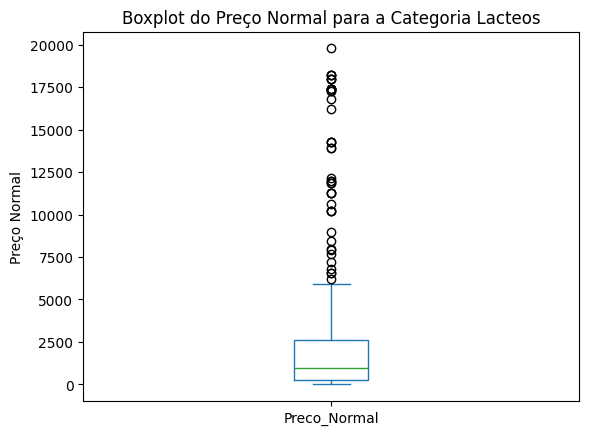

In [96]:
#Seu código aqui
df.loc[df['Categoria'] == 'lacteos', 'Preco_Normal'].plot.box() #Gráfico de caixa para a categoria 'lacteos'
plt.title('Boxplot do Preço Normal para a Categoria Lacteos')
plt.ylabel('Preço Normal')
plt.show()

Os produtos da Categoria dos lacteos apresentam muitos Outliers, podendo ser um dos motivos para o qual o desvio padrão tenha dado tão alto.

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

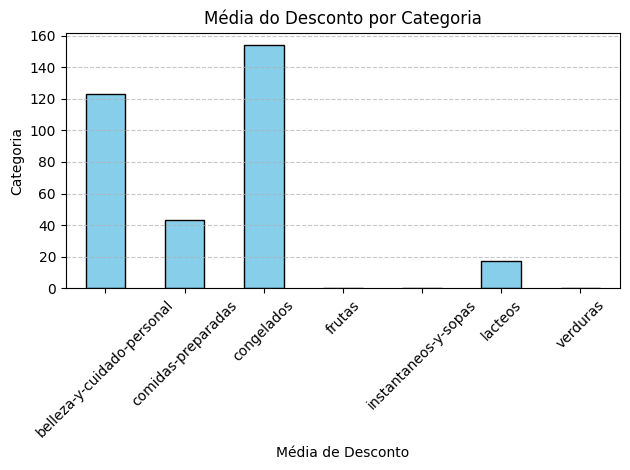

In [87]:
# Seu código aqui
media_desconto = df['Desconto'].groupby(df['Categoria']).mean()
# print("Média do Preço com Desconto:", media_desconto)

media_desconto.plot(kind='bar', color='skyblue', edgecolor='black') # Gráfico de barras
plt.title('Média do Desconto por Categoria')
plt.ylabel('Categoria')
plt.xlabel('Média de Desconto')
plt.xticks(rotation=45) # Rotaciona os nomes para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona linhas de grade suaves
plt.tight_layout() # Ajusta o layout para não cortar textos

plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [ ]:
# Seu código aqui
# Agrupar por Categoria e Marca, calculando a média do desconto
df_grouped = df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index() # Reseta o índice para facilitar o uso no Plotly

# (Opcional) Filtrar apenas onde existe desconto para o gráfico não ficar cheio de zeros
df_grouped = df_grouped[df_grouped['Desconto'] > 0]

# Criar o Mapa de Árvore (TreeMap) Interativo
fig = px.treemap(df_grouped, 
                 path=['Categoria', 'Marca'],  # Define a hierarquia
                 values='Desconto',            # O tamanho do quadrado será a média do desconto
                 color='Desconto',             # A cor também indica a intensidade do desconto
                 color_continuous_scale='RdBu',
                 title='Mapa Interativo de Descontos (Categoria > Marca)')
fig.show(renderer="browser") # Usei dessa forma pois o VSCode as vezes não estava renderizando corretamente apenas com fig.show()